In [1]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Tk().withdraw()  # 隐藏 root 窗口
file_path = askopenfilename(title="Select the UPDRS data file")

df = pd.read_csv(file_path)
print("reading success！")


reading success！


In [2]:
import pandas as pd


df.columns = [col.strip() for col in df.columns]

target_col = 'total_UPDRS'

feature_cols = [col for col in df.columns if col not in ['subject#', 'motor_UPDRS', 'total_UPDRS', 'test_time']]

X = df[feature_cols]
y = df[target_col]

print(f"number of feature: {X.shape[1]}, number of sample: {X.shape[0]}")


number of feature: 18, number of sample: 5875


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

print(X_scaled.head())


        age       sex  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0  0.815695 -0.682509   0.082905    -0.284242    0.327453    -0.028637   
1  0.815695 -0.682509  -0.560793    -0.756723   -0.533746    -0.476212   
2  0.815695 -0.682509  -0.238944    -0.539382   -0.300038    -0.320767   
3  0.815695 -0.682509  -0.155370    -0.485186   -0.344859    -0.170682   
4  0.815695 -0.682509  -0.498557    -0.663894   -0.658604    -0.529814   

   Jitter:DDP   Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0    0.328505 -0.324594    -0.351642     -0.209709     -0.423356   
1   -0.534825 -0.534016    -0.573156     -0.545158     -0.565592   
2   -0.298983 -0.669115    -0.564469     -0.741592     -0.702426   
3   -0.344871 -0.423692     0.069668     -0.460540     -0.449763   
4   -0.659682 -0.658276    -0.586186     -0.783145     -0.651413   

   Shimmer:APQ11  Shimmer:DDA       NHR       HNR      RPDE       DFA  \
0      -0.543466    -0.209704 -0.298721 -0.009205 -1.214066 -1.478500   


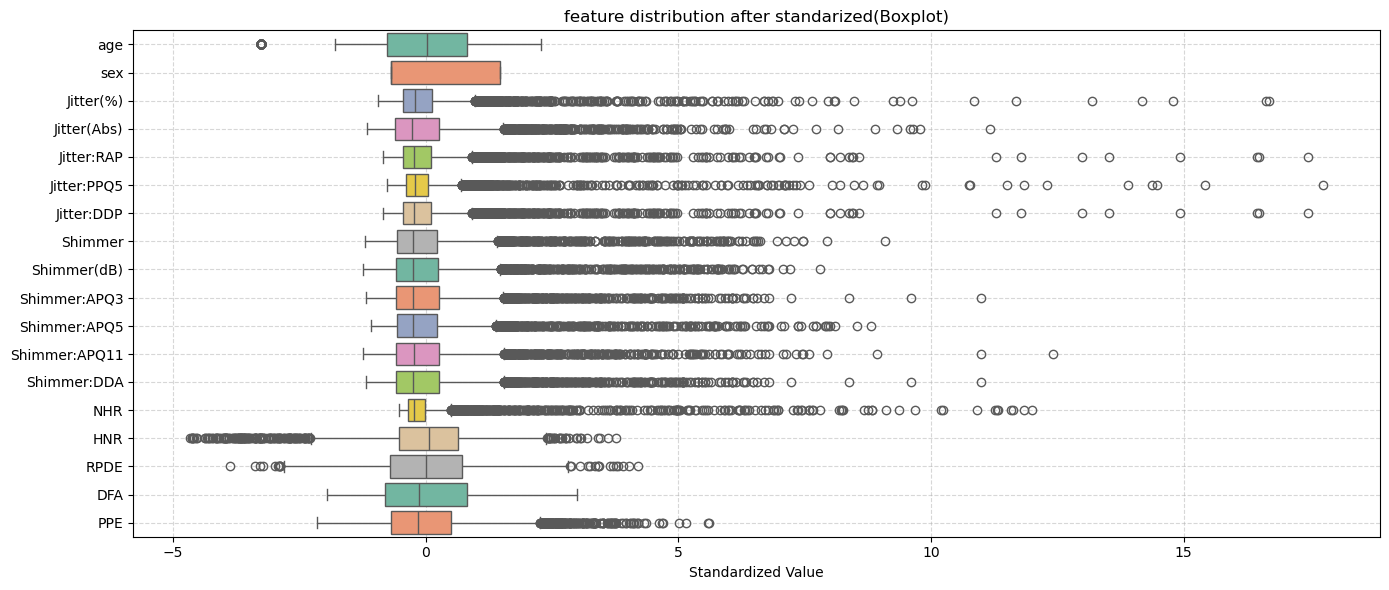

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=X_scaled, orient='h', palette="Set2")
plt.title("feature distribution after standarized(Boxplot)")
plt.xlabel("Standardized Value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


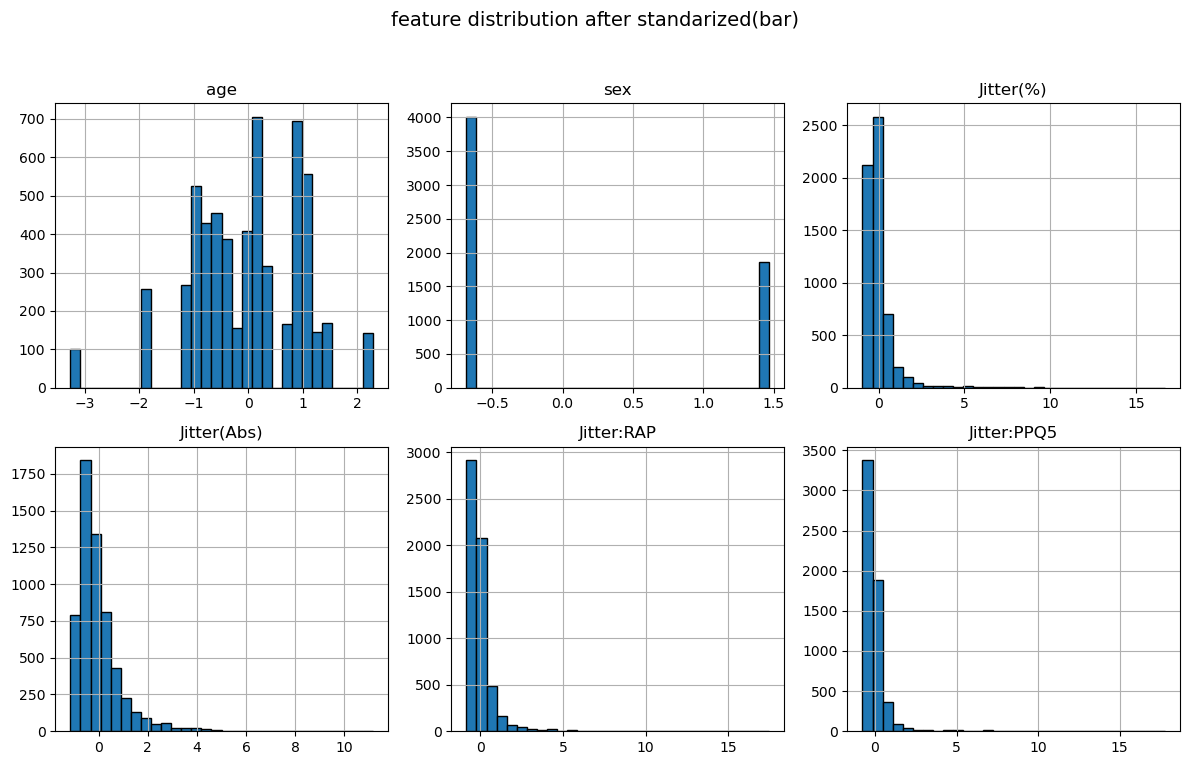

In [7]:
sample_features = X_scaled.columns[:6] 
X_scaled[sample_features].hist(
    figsize=(12, 8),
    bins=30,
    layout=(2, 3),
    edgecolor='black'
)
plt.suptitle("feature distribution after standarized(bar)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [8]:
from sklearn.model_selection import GroupShuffleSplit

# 拆分数据用的组标签
groups = df['subject#']

# 初始化分组划分器（80% train, 20% val）
gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_idx, val_idx = next(gss.split(X_scaled, y, groups=groups))

# 得到拆分结果
X_train, X_val = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

print(f"number of training set: {len(X_train)}, number of validation: {len(X_val)}")


number of training set: 4640, number of validation: 1235


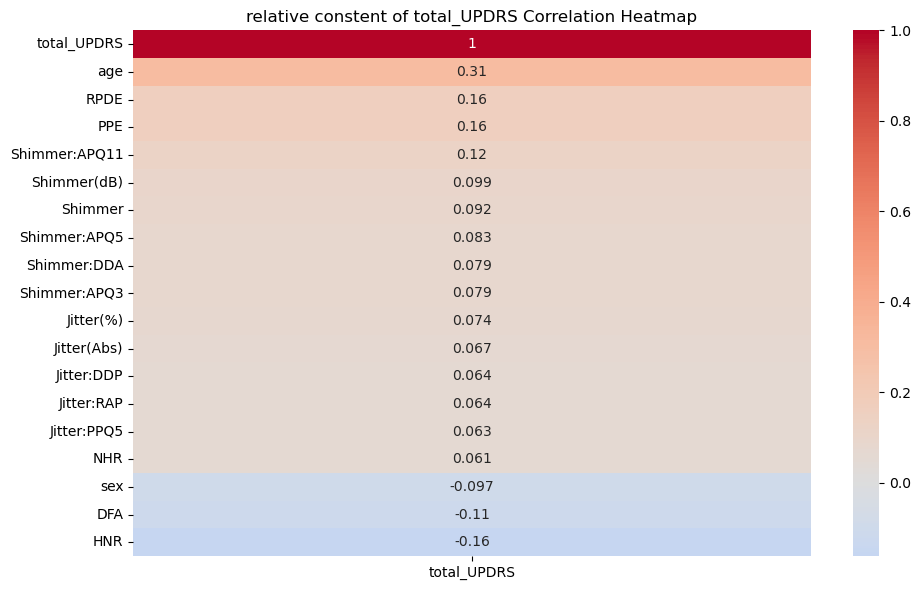

In [9]:
corr_df = X_scaled.copy()
corr_df['total_UPDRS'] = y

corr = corr_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['total_UPDRS']].sort_values(by='total_UPDRS', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('relative constent of total_UPDRS Correlation Heatmap')
plt.tight_layout()
plt.show()


In [10]:
print(len(y_val), len(y_pred_rf))

1235 1175


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


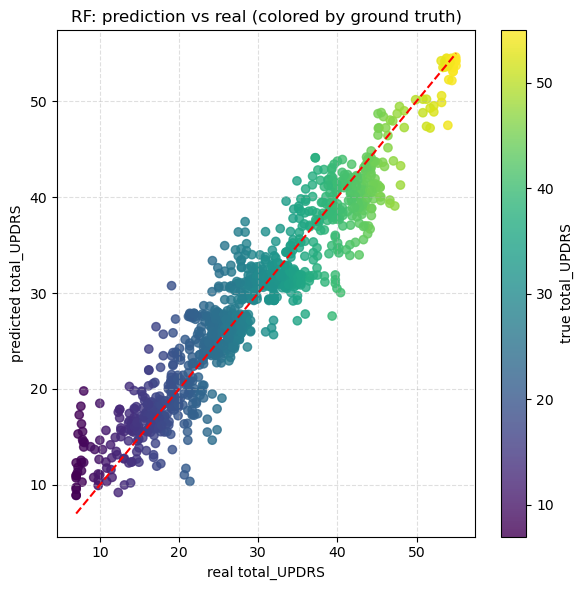

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_rf, c=y_val, cmap='viridis', alpha=0.8)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r')
plt.xlabel('real total_UPDRS')
plt.ylabel('predicted total_UPDRS')
plt.title('RF: prediction vs real (colored by ground truth)')
plt.colorbar(label='true total_UPDRS')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

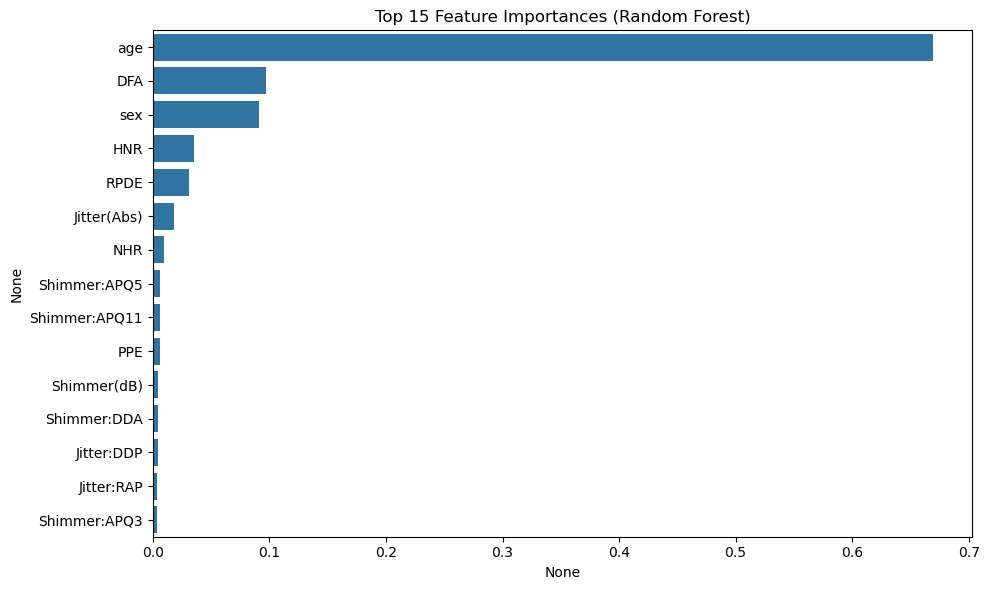

In [13]:

import pandas as pd
import seaborn as sns

feat_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importance = feat_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance[:15], y=feat_importance.index[:15])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [14]:
# 如果你已经有 feat_importance，提取前15特征名
top15_features = feat_importance.index[:15].tolist()

# 用这些特征重构 X 数据
X_top15 = X[top15_features]


In [15]:
from sklearn.ensemble import RandomForestRegressor

# 训练模型（你已完成这一步）
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_top15, y, test_size=0.2, random_state=42)

# 再次训练模型
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# 进行预测
y_pred_rf = rf.predict(X_val)


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_val, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred_rf)
r2 = r2_score(y_val, y_pred_rf)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


MSE: 9.612052694908314
RMSE: 3.1003310621461564
MAE: 2.310064884420752
R²: 0.91325883301417


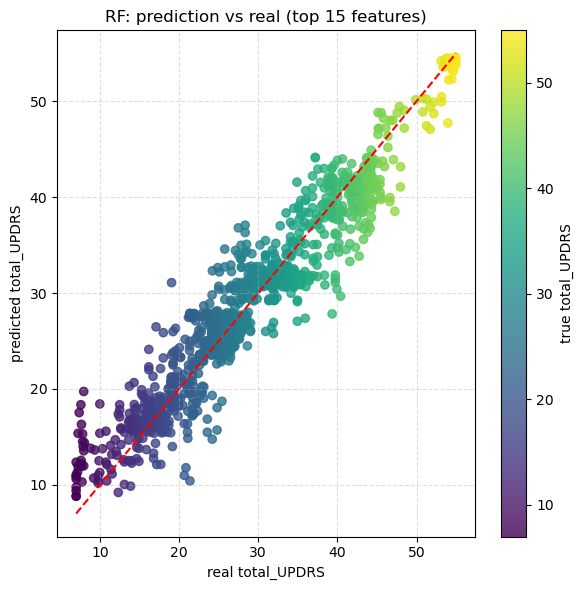

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_rf, c=y_val, cmap='viridis', alpha=0.8)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r')
plt.xlabel('real total_UPDRS')
plt.ylabel('predicted total_UPDRS')
plt.title('RF: prediction vs real (top 15 features)')
plt.colorbar(label='true total_UPDRS')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [19]:
# 全特征数据建模
X_train_all, X_val_all, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 Random Forest 模型训练
rf_all = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_all.fit(X_train_all, y_train)

# 得到全特征的预测结果
y_pred_rf_all = rf_all.predict(X_val_all)

In [20]:
# 比较之前模型（全特征）的 y_pred_rf_all 与 y_val
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 记得把之前的全特征预测结果保存为 y_pred_rf_all
mse_all = mean_squared_error(y_val, y_pred_rf_all)
r2_all = r2_score(y_val, y_pred_rf_all)

mse_top15 = mean_squared_error(y_val, y_pred_rf)
r2_top15 = r2_score(y_val, y_pred_rf)

print("full-feature model:")
print(f"  MSE: {mse_all:.2f} | R²: {r2_all:.4f}")

print("Top15 feature model:")
print(f"  MSE: {mse_top15:.2f} | R²: {r2_top15:.4f}")


full-feature model:
  MSE: 9.62 | R²: 0.9132
Top15 feature model:
  MSE: 9.61 | R²: 0.9133


In [21]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_val)


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_top15, y, cv=5, scoring='r2')
print("R² scores:", scores)
print("average R²:", np.mean(scores))


R² scores: [-1.85957221 -4.7583971   0.30874584 -0.85420484 -1.05735353]
average R²: -1.644156367379408


In [23]:
errors = abs(y_val - y_pred_rf)
top_errors = errors.sort_values(ascending=False).head()
print(df.loc[top_errors.index])


      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
932          7   72    0   175.3000       13.042      19.0510    0.00340   
2437        18   65    0     4.3604        6.000       7.9555    0.00339   
84           1   72    0    75.6560       30.670      39.3400    0.00719   
2053        15   65    0   145.4800       15.000      21.3710    0.00275   
2463        18   65    0    39.4170        6.000       7.5978    0.00248   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
932      0.000032     0.00133      0.00207  ...        0.216       0.01155   
2437     0.000025     0.00108      0.00149  ...        0.120       0.00517   
84       0.000048     0.00297      0.00310  ...        0.418       0.02177   
2053     0.000020     0.00144      0.00145  ...        0.155       0.00954   
2463     0.000018     0.00090      0.00118  ...        0.156       0.00766   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE 

In [24]:
X_train_all, X_val_all, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_all = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_all.fit(X_train_all, y_train)

y_pred_rf_all = rf_all.predict(X_val_all)


 98%|===================| 1149/1175 [00:19<00:00]        

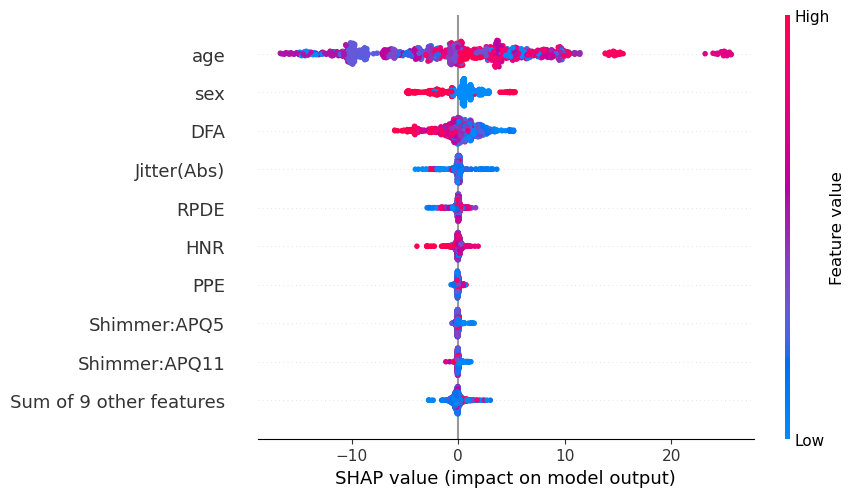

In [25]:
import shap

explainer = shap.Explainer(rf_all, X_train_all)

shap_values = explainer(X_val_all)

shap.plots.beeswarm(shap_values)


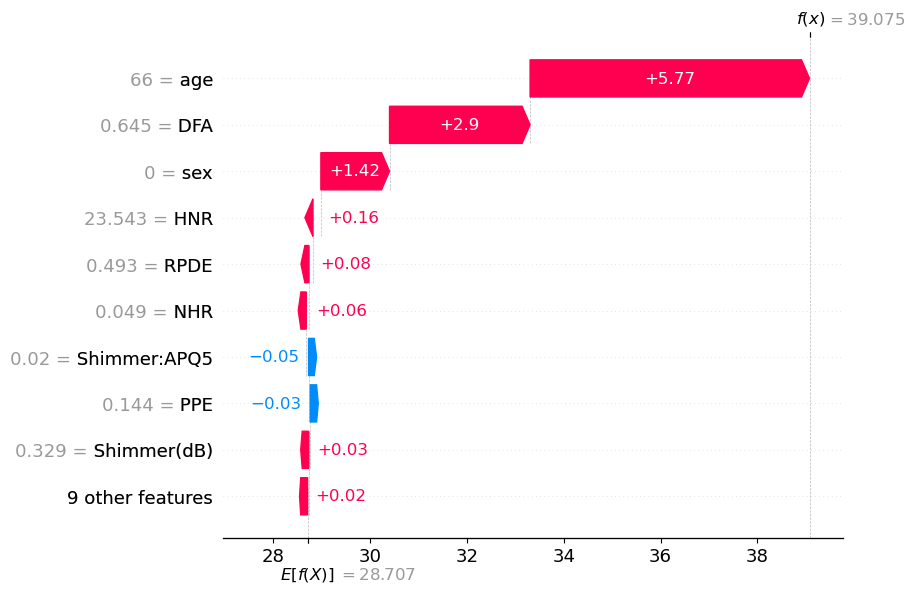

In [26]:
shap.plots.waterfall(shap_values[0])


In [27]:
shap.initjs()
shap.plots.force(shap_values[0])

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models import FTTransformerConfig
from pytorch_lightning.loggers import CSVLogger

In [ ]:
from pytorch_tabular.models import FTTransformerConfig
from pytorch_tabular.models.common.heads import LinearHeadConfig

# 回归任务的头部配置（简单线性头）
head_config = LinearHeadConfig(
    layers="",      # 线性层，前面已经有 backbone 了，这里不用再加 MLP
    dropout=0.0,
).__dict__

model_config = FTTransformerConfig(
    task="regression",
    learning_rate=3e-4,
    num_attn_blocks=4,          
    num_heads=8,                
    transformer_head_dim=64,    
    ff_dropout=0.1,
    attn_dropout=0.1,
    batch_norm_continuous_input=True,
    head="LinearHead",
    head_config={"layers": "256-128"},
    metrics=["mean_squared_error"], 
)
print(model_config)

FTTransformerConfig(task='regression', head='LinearHead', head_config={'layers': '256-128'}, embedding_dims=None, embedding_dropout=0.0, batch_norm_continuous_input=True, learning_rate=0.0003, loss='MSELoss', metrics=['mean_squared_error'], metrics_prob_input=[False], metrics_params=[{}], target_range=None, virtual_batch_size=None, seed=42, _module_src='models.ft_transformer', _model_name='FTTransformerModel', _backbone_name='FTTransformerBackbone', _config_name='FTTransformerConfig', input_embed_dim=32, embedding_initialization='kaiming_uniform', embedding_bias=True, share_embedding=False, share_embedding_strategy='fraction', shared_embedding_fraction=0.25, attn_feature_importance=True, num_heads=8, num_attn_blocks=4, transformer_head_dim=64, attn_dropout=0.1, add_norm_dropout=0.1, ff_dropout=0.1, ff_hidden_multiplier=4, transformer_activation='GEGLU')


In [30]:
# 假设你前面已经有：
# df           -> 原始数据
# feature_cols -> 特征列名列表
# target_col   -> 目标变量列名，比如 "total_UPDRS"

# 只保留建模用的列
model_cols = feature_cols + [target_col]
model_df = df[model_cols].copy()

# 划分训练集 / 验证集
train_df, val_df = train_test_split(model_df, test_size=0.2, random_state=42)

# ---- DataConfig：告诉 TabularModel 哪些是特征哪些是标签 ----
data_config = DataConfig(
    target=[target_col],
    continuous_cols=feature_cols,
)

# ---- TrainerConfig：训练超参数 & 设备配置 ----
trainer_config = TrainerConfig(
    max_epochs=80,          # 先少一点，确认能跑通
    batch_size=256,
    accelerator="cpu",      # Mac 或没有 GPU 就写 "cpu"
    devices=1,
    early_stopping_patience=10,
    # load_best=False,
    checkpoints="valid_loss",   # 监控 valid_loss 存 checkpoint
    # load_best=True,   
)

# ---- FT-Transformer 模型配置 ----
print(FTTransformerConfig.__dataclass_fields__.keys())


# print(model_config)
# ---- 优化器配置 ----
optimizer_config = OptimizerConfig(
    optimizer="AdamW"
)

# ---- 日志记录器（可选，但挺方便）----
# csv_logger = CSVLogger("logs", name="ft_transformer")

# ---- 最终只在这里创建一次 tabular_model ----
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    # logger=csv_logger,
)


dict_keys(['task', 'head', 'head_config', 'embedding_dims', 'embedding_dropout', 'batch_norm_continuous_input', 'learning_rate', 'loss', 'metrics', 'metrics_prob_input', 'metrics_params', 'target_range', 'virtual_batch_size', 'seed', '_module_src', '_model_name', '_backbone_name', '_config_name', 'input_embed_dim', 'embedding_initialization', 'embedding_bias', 'share_embedding', 'share_embedding_strategy', 'shared_embedding_fraction', 'attn_feature_importance', 'num_heads', 'num_attn_blocks', 'transformer_head_dim', 'attn_dropout', 'add_norm_dropout', 'ff_dropout', 'ff_hidden_multiplier', 'transformer_activation'])


2025-12-08 21:20:48,332 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [31]:
from pytorch_lightning.callbacks import Callback

class LossRecorder(Callback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.val_losses = []

    def on_train_epoch_end(self, trainer, pl_module):
        metrics = trainer.callback_metrics
        print("[Train epoch end] metrics:", metrics)

        if "train_loss" in metrics:
            loss = metrics["train_loss"]
        elif "loss" in metrics:
            loss = metrics["loss"]
        else:
            return

        try:
            loss_val = float(loss.detach().cpu())
        except AttributeError:
            loss_val = float(loss)
        self.train_losses.append(loss_val)
        print("  -> record train loss =", loss_val)

    def on_validation_epoch_end(self, trainer, pl_module):
        metrics = trainer.callback_metrics
        print("[Val epoch end] metrics:", metrics)

        if "valid_loss" in metrics:
            loss = metrics["valid_loss"]
        elif "val_loss" in metrics:
            loss = metrics["val_loss"]
        elif "loss" in metrics:
            loss = metrics["loss"]
        else:
            return

        try:
            loss_val = float(loss.detach().cpu())
        except AttributeError:
            loss_val = float(loss)
        self.val_losses.append(loss_val)
        print("  -> record val loss =", loss_val)


In [32]:
from sklearn.model_selection import train_test_split

# df 必须包含所有 feature_cols + target_col 这些列
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


In [33]:
import torch

_real_torch_load = torch.load

def patched_torch_load(*args, **kwargs):
    # 如果没显式写 weights_only，就强制设成 False
    kwargs.setdefault("weights_only", False)
    return _real_torch_load(*args, **kwargs)

torch.load = patched_torch_load
print("Patched torch.load: default weights_only=False")


Patched torch.load: default weights_only=False


In [34]:
loss_recorder = LossRecorder()

tabular_model.fit(
    train=train_df,
    validation=val_df,
    callbacks=[loss_recorder],  
    handle_oom=False,
)

Seed set to 42


2025-12-08 21:20:48,416 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-12-08 21:20:48,420 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.54589801 -0.66063375  0.37198792 ...  0.25725218  0.14251644
 -0.20169079]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.67896134 -0.67896134  1.47283791 ... -0.67896134 -0.67896134
 -0.67896134]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tab

2025-12-08 21:20:48,434 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-12-08 21:20:48,452 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-12-08 21:20:48,466 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

2025-12-08 21:20:48.613731: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-08 21:20:48.636417: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-08 21:20:49.277354: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  180 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  1.2 K │ train │
│ 2 │ _head            │ LinearHead            │ 41.5 K │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 223 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 223 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 90                                                                                          
Modules in eval mode: 0

Output()

/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.
py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of
the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.

/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 
'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)

[Val epoch end] metrics: {'valid_loss': tensor(989.7452), 'valid_mean_squared_error': tensor(989.7452)}

-> record val loss = 989.7452392578125

/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.
py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value 
of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.

/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number 
of training batches (19) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for 
log_every_n_steps if you want to see logs for the training epoch.

[Val epoch end] metrics: {'train_loss': tensor(403.7632), 'valid_loss': tensor(359.6887), 
'valid_mean_squared_error': tensor(359.6887)}

-> record val loss = 359.688720703125

[Train epoch end] metrics: {'train_loss': tensor(403.7632), 'valid_loss': tensor(359.6887), 
'valid_mean_squared_error': tensor(359.6887), 'train_mean_squared_error': tensor(663.3115)}

-> record train loss = 403.7631530761719

[Val epoch end] metrics: {'train_loss': tensor(120.6748), 'valid_loss': tensor(147.6125), 
'valid_mean_squared_error': tensor(147.6125), 'train_mean_squared_error': tensor(663.3115)}

-> record val loss = 147.612548828125

[Train epoch end] metrics: {'train_loss': tensor(120.6748), 'valid_loss': tensor(147.6125), 
'valid_mean_squared_error': tensor(147.6125), 'train_mean_squared_error': tensor(267.4789)}

-> record train loss = 120.6748275756836

[Val epoch end] metrics: {'train_loss': tensor(107.8179), 'valid_loss': tensor(111.3664), 
'valid_mean_squared_error': tensor(111.3664), 'train_mean_squared_error': tensor(267.4789)}

-> record val loss = 111.36642456054688

[Train epoch end] metrics: {'train_loss': tensor(107.8179), 'valid_loss': tensor(111.3664), 
'valid_mean_squared_error': tensor(111.3664), 'train_mean_squared_error': tensor(128.6517)}

-> record train loss = 107.81787109375

[Val epoch end] metrics: {'train_loss': tensor(97.4940), 'valid_loss': tensor(108.0757), 
'valid_mean_squared_error': tensor(108.0757), 'train_mean_squared_error': tensor(128.6517)}

-> record val loss = 108.07566833496094

[Train epoch end] metrics: {'train_loss': tensor(97.4940), 'valid_loss': tensor(108.0757), 
'valid_mean_squared_error': tensor(108.0757), 'train_mean_squared_error': tensor(114.8832)}

-> record train loss = 97.4940414428711

[Val epoch end] metrics: {'train_loss': tensor(85.4473), 'valid_loss': tensor(101.7023), 
'valid_mean_squared_error': tensor(101.7023), 'train_mean_squared_error': tensor(114.8832)}

-> record val loss = 101.70228576660156

[Train epoch end] metrics: {'train_loss': tensor(85.4473), 'valid_loss': tensor(101.7023), 
'valid_mean_squared_error': tensor(101.7023), 'train_mean_squared_error': tensor(111.4528)}

-> record train loss = 85.447265625

[Val epoch end] metrics: {'train_loss': tensor(74.1303), 'valid_loss': tensor(95.4503), 'valid_mean_squared_error':
tensor(95.4503), 'train_mean_squared_error': tensor(111.4528)}

-> record val loss = 95.45034790039062

[Train epoch end] metrics: {'train_loss': tensor(74.1303), 'valid_loss': tensor(95.4503), 
'valid_mean_squared_error': tensor(95.4503), 'train_mean_squared_error': tensor(105.0605)}

-> record train loss = 74.1303482055664

[Val epoch end] metrics: {'train_loss': tensor(98.1043), 'valid_loss': tensor(92.2924), 'valid_mean_squared_error':
tensor(92.2924), 'train_mean_squared_error': tensor(105.0605)}

-> record val loss = 92.29244232177734

[Train epoch end] metrics: {'train_loss': tensor(98.1043), 'valid_loss': tensor(92.2924), 
'valid_mean_squared_error': tensor(92.2924), 'train_mean_squared_error': tensor(100.0721)}

-> record train loss = 98.10425567626953

[Val epoch end] metrics: {'train_loss': tensor(84.8571), 'valid_loss': tensor(91.6930), 'valid_mean_squared_error':
tensor(91.6930), 'train_mean_squared_error': tensor(100.0721)}

-> record val loss = 91.69296264648438

[Train epoch end] metrics: {'train_loss': tensor(84.8571), 'valid_loss': tensor(91.6930), 
'valid_mean_squared_error': tensor(91.6930), 'train_mean_squared_error': tensor(96.8611)}

-> record train loss = 84.8570556640625

[Val epoch end] metrics: {'train_loss': tensor(86.8784), 'valid_loss': tensor(90.4122), 'valid_mean_squared_error':
tensor(90.4122), 'train_mean_squared_error': tensor(96.8611)}

-> record val loss = 90.41217803955078

[Train epoch end] metrics: {'train_loss': tensor(86.8784), 'valid_loss': tensor(90.4122), 
'valid_mean_squared_error': tensor(90.4122), 'train_mean_squared_error': tensor(94.4085)}

-> record train loss = 86.87844848632812

[Val epoch end] metrics: {'train_loss': tensor(78.0267), 'valid_loss': tensor(87.1658), 'valid_mean_squared_error':
tensor(87.1658), 'train_mean_squared_error': tensor(94.4085)}

-> record val loss = 87.16584777832031

[Train epoch end] metrics: {'train_loss': tensor(78.0267), 'valid_loss': tensor(87.1658), 
'valid_mean_squared_error': tensor(87.1658), 'train_mean_squared_error': tensor(92.4792)}

-> record train loss = 78.02666473388672

[Val epoch end] metrics: {'train_loss': tensor(80.7785), 'valid_loss': tensor(84.2663), 'valid_mean_squared_error':
tensor(84.2663), 'train_mean_squared_error': tensor(92.4792)}

-> record val loss = 84.26629638671875

[Train epoch end] metrics: {'train_loss': tensor(80.7785), 'valid_loss': tensor(84.2663), 
'valid_mean_squared_error': tensor(84.2663), 'train_mean_squared_error': tensor(88.8000)}

-> record train loss = 80.77848052978516

[Val epoch end] metrics: {'train_loss': tensor(95.6274), 'valid_loss': tensor(81.2287), 'valid_mean_squared_error':
tensor(81.2287), 'train_mean_squared_error': tensor(88.8000)}

-> record val loss = 81.22866821289062

[Train epoch end] metrics: {'train_loss': tensor(95.6274), 'valid_loss': tensor(81.2287), 
'valid_mean_squared_error': tensor(81.2287), 'train_mean_squared_error': tensor(87.2071)}

-> record train loss = 95.6274185180664

[Val epoch end] metrics: {'train_loss': tensor(62.5500), 'valid_loss': tensor(80.1529), 'valid_mean_squared_error':
tensor(80.1529), 'train_mean_squared_error': tensor(87.2071)}

-> record val loss = 80.15289306640625

[Train epoch end] metrics: {'train_loss': tensor(62.5500), 'valid_loss': tensor(80.1529), 
'valid_mean_squared_error': tensor(80.1529), 'train_mean_squared_error': tensor(82.9954)}

-> record train loss = 62.549991607666016

[Val epoch end] metrics: {'train_loss': tensor(87.5282), 'valid_loss': tensor(75.2640), 'valid_mean_squared_error':
tensor(75.2640), 'train_mean_squared_error': tensor(82.9954)}

-> record val loss = 75.26399230957031

[Train epoch end] metrics: {'train_loss': tensor(87.5282), 'valid_loss': tensor(75.2640), 
'valid_mean_squared_error': tensor(75.2640), 'train_mean_squared_error': tensor(80.9997)}

-> record train loss = 87.52815246582031

[Val epoch end] metrics: {'train_loss': tensor(82.3093), 'valid_loss': tensor(72.3569), 'valid_mean_squared_error':
tensor(72.3569), 'train_mean_squared_error': tensor(80.9997)}

-> record val loss = 72.35688781738281

[Train epoch end] metrics: {'train_loss': tensor(82.3093), 'valid_loss': tensor(72.3569), 
'valid_mean_squared_error': tensor(72.3569), 'train_mean_squared_error': tensor(78.4446)}

-> record train loss = 82.30931091308594

[Val epoch end] metrics: {'train_loss': tensor(93.1073), 'valid_loss': tensor(72.1331), 'valid_mean_squared_error':
tensor(72.1331), 'train_mean_squared_error': tensor(78.4446)}

-> record val loss = 72.13311767578125

[Train epoch end] metrics: {'train_loss': tensor(93.1073), 'valid_loss': tensor(72.1331), 
'valid_mean_squared_error': tensor(72.1331), 'train_mean_squared_error': tensor(76.4341)}

-> record train loss = 93.10730743408203

[Val epoch end] metrics: {'train_loss': tensor(60.0083), 'valid_loss': tensor(67.3132), 'valid_mean_squared_error':
tensor(67.3132), 'train_mean_squared_error': tensor(76.4341)}

-> record val loss = 67.31318664550781

[Train epoch end] metrics: {'train_loss': tensor(60.0083), 'valid_loss': tensor(67.3132), 
'valid_mean_squared_error': tensor(67.3132), 'train_mean_squared_error': tensor(73.5279)}

-> record train loss = 60.00834274291992

[Val epoch end] metrics: {'train_loss': tensor(77.3479), 'valid_loss': tensor(67.3863), 'valid_mean_squared_error':
tensor(67.3863), 'train_mean_squared_error': tensor(73.5279)}

-> record val loss = 67.38629913330078

[Train epoch end] metrics: {'train_loss': tensor(77.3479), 'valid_loss': tensor(67.3863), 
'valid_mean_squared_error': tensor(67.3863), 'train_mean_squared_error': tensor(71.0398)}

-> record train loss = 77.34785461425781

[Val epoch end] metrics: {'train_loss': tensor(89.0689), 'valid_loss': tensor(60.9121), 'valid_mean_squared_error':
tensor(60.9121), 'train_mean_squared_error': tensor(71.0398)}

-> record val loss = 60.912139892578125

[Train epoch end] metrics: {'train_loss': tensor(89.0689), 'valid_loss': tensor(60.9121), 
'valid_mean_squared_error': tensor(60.9121), 'train_mean_squared_error': tensor(68.9061)}

-> record train loss = 89.0688705444336

[Val epoch end] metrics: {'train_loss': tensor(79.9964), 'valid_loss': tensor(59.3573), 'valid_mean_squared_error':
tensor(59.3573), 'train_mean_squared_error': tensor(68.9061)}

-> record val loss = 59.35731506347656

[Train epoch end] metrics: {'train_loss': tensor(79.9964), 'valid_loss': tensor(59.3573), 
'valid_mean_squared_error': tensor(59.3573), 'train_mean_squared_error': tensor(67.4035)}

-> record train loss = 79.99639892578125

[Val epoch end] metrics: {'train_loss': tensor(64.7820), 'valid_loss': tensor(57.8647), 'valid_mean_squared_error':
tensor(57.8647), 'train_mean_squared_error': tensor(67.4035)}

-> record val loss = 57.864662170410156

[Train epoch end] metrics: {'train_loss': tensor(64.7820), 'valid_loss': tensor(57.8647), 
'valid_mean_squared_error': tensor(57.8647), 'train_mean_squared_error': tensor(65.7368)}

-> record train loss = 64.78201293945312

[Val epoch end] metrics: {'train_loss': tensor(57.9394), 'valid_loss': tensor(57.8748), 'valid_mean_squared_error':
tensor(57.8748), 'train_mean_squared_error': tensor(65.7368)}

-> record val loss = 57.874794006347656

[Train epoch end] metrics: {'train_loss': tensor(57.9394), 'valid_loss': tensor(57.8748), 
'valid_mean_squared_error': tensor(57.8748), 'train_mean_squared_error': tensor(62.5205)}

-> record train loss = 57.939395904541016

[Val epoch end] metrics: {'train_loss': tensor(59.6382), 'valid_loss': tensor(55.0959), 'valid_mean_squared_error':
tensor(55.0959), 'train_mean_squared_error': tensor(62.5205)}

-> record val loss = 55.095882415771484

[Train epoch end] metrics: {'train_loss': tensor(59.6382), 'valid_loss': tensor(55.0959), 
'valid_mean_squared_error': tensor(55.0959), 'train_mean_squared_error': tensor(60.7433)}

-> record train loss = 59.63818359375

[Val epoch end] metrics: {'train_loss': tensor(63.6117), 'valid_loss': tensor(54.2775), 'valid_mean_squared_error':
tensor(54.2775), 'train_mean_squared_error': tensor(60.7433)}

-> record val loss = 54.277462005615234

[Train epoch end] metrics: {'train_loss': tensor(63.6117), 'valid_loss': tensor(54.2775), 
'valid_mean_squared_error': tensor(54.2775), 'train_mean_squared_error': tensor(60.1939)}

-> record train loss = 63.611690521240234

[Val epoch end] metrics: {'train_loss': tensor(63.9926), 'valid_loss': tensor(51.4830), 'valid_mean_squared_error':
tensor(51.4830), 'train_mean_squared_error': tensor(60.1939)}

-> record val loss = 51.48295974731445

[Train epoch end] metrics: {'train_loss': tensor(63.9926), 'valid_loss': tensor(51.4830), 
'valid_mean_squared_error': tensor(51.4830), 'train_mean_squared_error': tensor(57.8218)}

-> record train loss = 63.992584228515625

[Val epoch end] metrics: {'train_loss': tensor(59.0171), 'valid_loss': tensor(50.4978), 'valid_mean_squared_error':
tensor(50.4978), 'train_mean_squared_error': tensor(57.8218)}

-> record val loss = 50.49776840209961

[Train epoch end] metrics: {'train_loss': tensor(59.0171), 'valid_loss': tensor(50.4978), 
'valid_mean_squared_error': tensor(50.4978), 'train_mean_squared_error': tensor(57.2949)}

-> record train loss = 59.017120361328125

[Val epoch end] metrics: {'train_loss': tensor(66.7090), 'valid_loss': tensor(48.9549), 'valid_mean_squared_error':
tensor(48.9549), 'train_mean_squared_error': tensor(57.2949)}

-> record val loss = 48.95489501953125

[Train epoch end] metrics: {'train_loss': tensor(66.7090), 'valid_loss': tensor(48.9549), 
'valid_mean_squared_error': tensor(48.9549), 'train_mean_squared_error': tensor(53.6758)}

-> record train loss = 66.70901489257812

[Val epoch end] metrics: {'train_loss': tensor(58.2202), 'valid_loss': tensor(47.9248), 'valid_mean_squared_error':
tensor(47.9248), 'train_mean_squared_error': tensor(53.6758)}

-> record val loss = 47.92475891113281

[Train epoch end] metrics: {'train_loss': tensor(58.2202), 'valid_loss': tensor(47.9248), 
'valid_mean_squared_error': tensor(47.9248), 'train_mean_squared_error': tensor(53.7744)}

-> record train loss = 58.22024154663086

[Val epoch end] metrics: {'train_loss': tensor(73.2972), 'valid_loss': tensor(52.2727), 'valid_mean_squared_error':
tensor(52.2727), 'train_mean_squared_error': tensor(53.7744)}

-> record val loss = 52.27272415161133

[Train epoch end] metrics: {'train_loss': tensor(73.2972), 'valid_loss': tensor(52.2727), 
'valid_mean_squared_error': tensor(52.2727), 'train_mean_squared_error': tensor(53.3939)}

-> record train loss = 73.29718017578125

[Val epoch end] metrics: {'train_loss': tensor(100.7090), 'valid_loss': tensor(44.5716), 
'valid_mean_squared_error': tensor(44.5716), 'train_mean_squared_error': tensor(53.3939)}

-> record val loss = 44.57159423828125

[Train epoch end] metrics: {'train_loss': tensor(100.7090), 'valid_loss': tensor(44.5716), 
'valid_mean_squared_error': tensor(44.5716), 'train_mean_squared_error': tensor(51.8216)}

-> record train loss = 100.70904541015625

[Val epoch end] metrics: {'train_loss': tensor(44.9064), 'valid_loss': tensor(42.3257), 'valid_mean_squared_error':
tensor(42.3257), 'train_mean_squared_error': tensor(51.8216)}

-> record val loss = 42.32573699951172

[Train epoch end] metrics: {'train_loss': tensor(44.9064), 'valid_loss': tensor(42.3257), 
'valid_mean_squared_error': tensor(42.3257), 'train_mean_squared_error': tensor(49.8444)}

-> record train loss = 44.90644454956055

[Val epoch end] metrics: {'train_loss': tensor(87.3615), 'valid_loss': tensor(40.7574), 'valid_mean_squared_error':
tensor(40.7574), 'train_mean_squared_error': tensor(49.8444)}

-> record val loss = 40.75736999511719

[Train epoch end] metrics: {'train_loss': tensor(87.3615), 'valid_loss': tensor(40.7574), 
'valid_mean_squared_error': tensor(40.7574), 'train_mean_squared_error': tensor(47.2621)}

-> record train loss = 87.36151123046875

[Val epoch end] metrics: {'train_loss': tensor(45.9621), 'valid_loss': tensor(40.5266), 'valid_mean_squared_error':
tensor(40.5266), 'train_mean_squared_error': tensor(47.2621)}

-> record val loss = 40.52656173706055

[Train epoch end] metrics: {'train_loss': tensor(45.9621), 'valid_loss': tensor(40.5266), 
'valid_mean_squared_error': tensor(40.5266), 'train_mean_squared_error': tensor(48.1870)}

-> record train loss = 45.96205139160156

[Val epoch end] metrics: {'train_loss': tensor(59.1168), 'valid_loss': tensor(43.1001), 'valid_mean_squared_error':
tensor(43.1001), 'train_mean_squared_error': tensor(48.1870)}

-> record val loss = 43.10010528564453

[Train epoch end] metrics: {'train_loss': tensor(59.1168), 'valid_loss': tensor(43.1001), 
'valid_mean_squared_error': tensor(43.1001), 'train_mean_squared_error': tensor(47.2120)}

-> record train loss = 59.1168098449707

[Val epoch end] metrics: {'train_loss': tensor(44.6835), 'valid_loss': tensor(38.1985), 'valid_mean_squared_error':
tensor(38.1985), 'train_mean_squared_error': tensor(47.2120)}

-> record val loss = 38.19845962524414

[Train epoch end] metrics: {'train_loss': tensor(44.6835), 'valid_loss': tensor(38.1985), 
'valid_mean_squared_error': tensor(38.1985), 'train_mean_squared_error': tensor(45.4393)}

-> record train loss = 44.683467864990234

[Val epoch end] metrics: {'train_loss': tensor(56.0254), 'valid_loss': tensor(38.6391), 'valid_mean_squared_error':
tensor(38.6391), 'train_mean_squared_error': tensor(45.4393)}

-> record val loss = 38.63914108276367

[Train epoch end] metrics: {'train_loss': tensor(56.0254), 'valid_loss': tensor(38.6391), 
'valid_mean_squared_error': tensor(38.6391), 'train_mean_squared_error': tensor(45.2294)}

-> record train loss = 56.02543258666992

[Val epoch end] metrics: {'train_loss': tensor(42.0955), 'valid_loss': tensor(35.6188), 'valid_mean_squared_error':
tensor(35.6188), 'train_mean_squared_error': tensor(45.2294)}

-> record val loss = 35.6187858581543

[Train epoch end] metrics: {'train_loss': tensor(42.0955), 'valid_loss': tensor(35.6188), 
'valid_mean_squared_error': tensor(35.6188), 'train_mean_squared_error': tensor(41.7294)}

-> record train loss = 42.095497131347656

[Val epoch end] metrics: {'train_loss': tensor(27.2246), 'valid_loss': tensor(33.0372), 'valid_mean_squared_error':
tensor(33.0372), 'train_mean_squared_error': tensor(41.7294)}

-> record val loss = 33.03720474243164

[Train epoch end] metrics: {'train_loss': tensor(27.2246), 'valid_loss': tensor(33.0372), 
'valid_mean_squared_error': tensor(33.0372), 'train_mean_squared_error': tensor(40.1749)}

-> record train loss = 27.224628448486328

[Val epoch end] metrics: {'train_loss': tensor(38.5230), 'valid_loss': tensor(33.1549), 'valid_mean_squared_error':
tensor(33.1549), 'train_mean_squared_error': tensor(40.1749)}

-> record val loss = 33.15492248535156

[Train epoch end] metrics: {'train_loss': tensor(38.5230), 'valid_loss': tensor(33.1549), 
'valid_mean_squared_error': tensor(33.1549), 'train_mean_squared_error': tensor(42.2350)}

-> record train loss = 38.523040771484375

[Val epoch end] metrics: {'train_loss': tensor(128.2303), 'valid_loss': tensor(34.3740), 
'valid_mean_squared_error': tensor(34.3740), 'train_mean_squared_error': tensor(42.2350)}

-> record val loss = 34.37403106689453

[Train epoch end] metrics: {'train_loss': tensor(128.2303), 'valid_loss': tensor(34.3740), 
'valid_mean_squared_error': tensor(34.3740), 'train_mean_squared_error': tensor(41.4508)}

-> record train loss = 128.2303009033203

[Val epoch end] metrics: {'train_loss': tensor(35.0296), 'valid_loss': tensor(31.6441), 'valid_mean_squared_error':
tensor(31.6441), 'train_mean_squared_error': tensor(41.4508)}

-> record val loss = 31.64412498474121

[Train epoch end] metrics: {'train_loss': tensor(35.0296), 'valid_loss': tensor(31.6441), 
'valid_mean_squared_error': tensor(31.6441), 'train_mean_squared_error': tensor(37.5916)}

-> record train loss = 35.02962875366211

[Val epoch end] metrics: {'train_loss': tensor(41.1309), 'valid_loss': tensor(31.2623), 'valid_mean_squared_error':
tensor(31.2623), 'train_mean_squared_error': tensor(37.5916)}

-> record val loss = 31.262290954589844

[Train epoch end] metrics: {'train_loss': tensor(41.1309), 'valid_loss': tensor(31.2623), 
'valid_mean_squared_error': tensor(31.2623), 'train_mean_squared_error': tensor(38.8244)}

-> record train loss = 41.13086700439453

[Val epoch end] metrics: {'train_loss': tensor(60.7894), 'valid_loss': tensor(31.4533), 'valid_mean_squared_error':
tensor(31.4533), 'train_mean_squared_error': tensor(38.8244)}

-> record val loss = 31.453317642211914

[Train epoch end] metrics: {'train_loss': tensor(60.7894), 'valid_loss': tensor(31.4533), 
'valid_mean_squared_error': tensor(31.4533), 'train_mean_squared_error': tensor(39.2819)}

-> record train loss = 60.7894401550293

[Val epoch end] metrics: {'train_loss': tensor(51.5181), 'valid_loss': tensor(31.3038), 'valid_mean_squared_error':
tensor(31.3038), 'train_mean_squared_error': tensor(39.2819)}

-> record val loss = 31.303796768188477

[Train epoch end] metrics: {'train_loss': tensor(51.5181), 'valid_loss': tensor(31.3038), 
'valid_mean_squared_error': tensor(31.3038), 'train_mean_squared_error': tensor(40.6723)}

-> record train loss = 51.5180549621582

[Val epoch end] metrics: {'train_loss': tensor(80.7060), 'valid_loss': tensor(30.7969), 'valid_mean_squared_error':
tensor(30.7969), 'train_mean_squared_error': tensor(40.6723)}

-> record val loss = 30.7968692779541

[Train epoch end] metrics: {'train_loss': tensor(80.7060), 'valid_loss': tensor(30.7969), 
'valid_mean_squared_error': tensor(30.7969), 'train_mean_squared_error': tensor(38.3591)}

-> record train loss = 80.7060317993164

[Val epoch end] metrics: {'train_loss': tensor(57.1615), 'valid_loss': tensor(36.4877), 'valid_mean_squared_error':
tensor(36.4877), 'train_mean_squared_error': tensor(38.3591)}

-> record val loss = 36.48771286010742

[Train epoch end] metrics: {'train_loss': tensor(57.1615), 'valid_loss': tensor(36.4877), 
'valid_mean_squared_error': tensor(36.4877), 'train_mean_squared_error': tensor(37.6915)}

-> record train loss = 57.161476135253906

[Val epoch end] metrics: {'train_loss': tensor(38.6455), 'valid_loss': tensor(33.8711), 'valid_mean_squared_error':
tensor(33.8711), 'train_mean_squared_error': tensor(37.6915)}

-> record val loss = 33.8711051940918

[Train epoch end] metrics: {'train_loss': tensor(38.6455), 'valid_loss': tensor(33.8711), 
'valid_mean_squared_error': tensor(33.8711), 'train_mean_squared_error': tensor(41.5056)}

-> record train loss = 38.64552307128906

[Val epoch end] metrics: {'train_loss': tensor(52.7489), 'valid_loss': tensor(31.5509), 'valid_mean_squared_error':
tensor(31.5509), 'train_mean_squared_error': tensor(41.5056)}

-> record val loss = 31.55093002319336

[Train epoch end] metrics: {'train_loss': tensor(52.7489), 'valid_loss': tensor(31.5509), 
'valid_mean_squared_error': tensor(31.5509), 'train_mean_squared_error': tensor(39.8778)}

-> record train loss = 52.74887466430664

[Val epoch end] metrics: {'train_loss': tensor(37.1888), 'valid_loss': tensor(29.7648), 'valid_mean_squared_error':
tensor(29.7648), 'train_mean_squared_error': tensor(39.8778)}

-> record val loss = 29.764814376831055

[Train epoch end] metrics: {'train_loss': tensor(37.1888), 'valid_loss': tensor(29.7648), 
'valid_mean_squared_error': tensor(29.7648), 'train_mean_squared_error': tensor(35.0673)}

-> record train loss = 37.18879318237305

[Val epoch end] metrics: {'train_loss': tensor(39.7604), 'valid_loss': tensor(31.0779), 'valid_mean_squared_error':
tensor(31.0779), 'train_mean_squared_error': tensor(35.0673)}

-> record val loss = 31.077892303466797

[Train epoch end] metrics: {'train_loss': tensor(39.7604), 'valid_loss': tensor(31.0779), 
'valid_mean_squared_error': tensor(31.0779), 'train_mean_squared_error': tensor(35.8689)}

-> record train loss = 39.760440826416016

[Val epoch end] metrics: {'train_loss': tensor(22.7194), 'valid_loss': tensor(33.8051), 'valid_mean_squared_error':
tensor(33.8051), 'train_mean_squared_error': tensor(35.8689)}

-> record val loss = 33.80510330200195

[Train epoch end] metrics: {'train_loss': tensor(22.7194), 'valid_loss': tensor(33.8051), 
'valid_mean_squared_error': tensor(33.8051), 'train_mean_squared_error': tensor(38.3584)}

-> record train loss = 22.71944808959961

[Val epoch end] metrics: {'train_loss': tensor(30.4792), 'valid_loss': tensor(31.8539), 'valid_mean_squared_error':
tensor(31.8539), 'train_mean_squared_error': tensor(38.3584)}

-> record val loss = 31.85394287109375

[Train epoch end] metrics: {'train_loss': tensor(30.4792), 'valid_loss': tensor(31.8539), 
'valid_mean_squared_error': tensor(31.8539), 'train_mean_squared_error': tensor(36.7210)}

-> record train loss = 30.479202270507812

[Val epoch end] metrics: {'train_loss': tensor(38.2044), 'valid_loss': tensor(31.2365), 'valid_mean_squared_error':
tensor(31.2365), 'train_mean_squared_error': tensor(36.7210)}

-> record val loss = 31.236528396606445

[Train epoch end] metrics: {'train_loss': tensor(38.2044), 'valid_loss': tensor(31.2365), 
'valid_mean_squared_error': tensor(31.2365), 'train_mean_squared_error': tensor(36.9395)}

-> record train loss = 38.204402923583984

[Val epoch end] metrics: {'train_loss': tensor(36.5902), 'valid_loss': tensor(28.9187), 'valid_mean_squared_error':
tensor(28.9187), 'train_mean_squared_error': tensor(36.9395)}

-> record val loss = 28.918712615966797

[Train epoch end] metrics: {'train_loss': tensor(36.5902), 'valid_loss': tensor(28.9187), 
'valid_mean_squared_error': tensor(28.9187), 'train_mean_squared_error': tensor(35.7049)}

-> record train loss = 36.5902214050293

[Val epoch end] metrics: {'train_loss': tensor(32.7230), 'valid_loss': tensor(27.7679), 'valid_mean_squared_error':
tensor(27.7679), 'train_mean_squared_error': tensor(35.7049)}

-> record val loss = 27.76789665222168

[Train epoch end] metrics: {'train_loss': tensor(32.7230), 'valid_loss': tensor(27.7679), 
'valid_mean_squared_error': tensor(27.7679), 'train_mean_squared_error': tensor(33.9636)}

-> record train loss = 32.722965240478516

[Val epoch end] metrics: {'train_loss': tensor(26.7410), 'valid_loss': tensor(29.3524), 'valid_mean_squared_error':
tensor(29.3524), 'train_mean_squared_error': tensor(33.9636)}

-> record val loss = 29.352384567260742

[Train epoch end] metrics: {'train_loss': tensor(26.7410), 'valid_loss': tensor(29.3524), 
'valid_mean_squared_error': tensor(29.3524), 'train_mean_squared_error': tensor(35.6371)}

-> record train loss = 26.7409610748291

[Val epoch end] metrics: {'train_loss': tensor(32.9664), 'valid_loss': tensor(26.9810), 'valid_mean_squared_error':
tensor(26.9810), 'train_mean_squared_error': tensor(35.6371)}

-> record val loss = 26.981046676635742

[Train epoch end] metrics: {'train_loss': tensor(32.9664), 'valid_loss': tensor(26.9810), 
'valid_mean_squared_error': tensor(26.9810), 'train_mean_squared_error': tensor(33.3584)}

-> record train loss = 32.966373443603516

[Val epoch end] metrics: {'train_loss': tensor(42.6757), 'valid_loss': tensor(28.6195), 'valid_mean_squared_error':
tensor(28.6195), 'train_mean_squared_error': tensor(33.3584)}

-> record val loss = 28.61945152282715

[Train epoch end] metrics: {'train_loss': tensor(42.6757), 'valid_loss': tensor(28.6195), 
'valid_mean_squared_error': tensor(28.6195), 'train_mean_squared_error': tensor(38.2840)}

-> record train loss = 42.67569351196289

[Val epoch end] metrics: {'train_loss': tensor(31.4029), 'valid_loss': tensor(26.9573), 'valid_mean_squared_error':
tensor(26.9573), 'train_mean_squared_error': tensor(38.2840)}

-> record val loss = 26.95729637145996

[Train epoch end] metrics: {'train_loss': tensor(31.4029), 'valid_loss': tensor(26.9573), 
'valid_mean_squared_error': tensor(26.9573), 'train_mean_squared_error': tensor(32.9469)}

-> record train loss = 31.402873992919922

[Val epoch end] metrics: {'train_loss': tensor(33.7289), 'valid_loss': tensor(28.3618), 'valid_mean_squared_error':
tensor(28.3618), 'train_mean_squared_error': tensor(32.9469)}

-> record val loss = 28.361791610717773

[Train epoch end] metrics: {'train_loss': tensor(33.7289), 'valid_loss': tensor(28.3618), 
'valid_mean_squared_error': tensor(28.3618), 'train_mean_squared_error': tensor(34.8586)}

-> record train loss = 33.728851318359375

[Val epoch end] metrics: {'train_loss': tensor(35.0909), 'valid_loss': tensor(28.3959), 'valid_mean_squared_error':
tensor(28.3959), 'train_mean_squared_error': tensor(34.8586)}

-> record val loss = 28.39594841003418

[Train epoch end] metrics: {'train_loss': tensor(35.0909), 'valid_loss': tensor(28.3959), 
'valid_mean_squared_error': tensor(28.3959), 'train_mean_squared_error': tensor(36.0069)}

-> record train loss = 35.09093475341797

[Val epoch end] metrics: {'train_loss': tensor(40.7795), 'valid_loss': tensor(30.8026), 'valid_mean_squared_error':
tensor(30.8026), 'train_mean_squared_error': tensor(36.0069)}

-> record val loss = 30.80262565612793

[Train epoch end] metrics: {'train_loss': tensor(40.7795), 'valid_loss': tensor(30.8026), 
'valid_mean_squared_error': tensor(30.8026), 'train_mean_squared_error': tensor(39.1374)}

-> record train loss = 40.779544830322266

[Val epoch end] metrics: {'train_loss': tensor(31.1475), 'valid_loss': tensor(28.5445), 'valid_mean_squared_error':
tensor(28.5445), 'train_mean_squared_error': tensor(39.1374)}

-> record val loss = 28.54454803466797

[Train epoch end] metrics: {'train_loss': tensor(31.1475), 'valid_loss': tensor(28.5445), 
'valid_mean_squared_error': tensor(28.5445), 'train_mean_squared_error': tensor(32.2630)}

-> record train loss = 31.14752960205078

[Val epoch end] metrics: {'train_loss': tensor(28.3267), 'valid_loss': tensor(28.3942), 'valid_mean_squared_error':
tensor(28.3942), 'train_mean_squared_error': tensor(32.2630)}

-> record val loss = 28.394208908081055

[Train epoch end] metrics: {'train_loss': tensor(28.3267), 'valid_loss': tensor(28.3942), 
'valid_mean_squared_error': tensor(28.3942), 'train_mean_squared_error': tensor(36.6670)}

-> record train loss = 28.32674217224121

[Val epoch end] metrics: {'train_loss': tensor(27.9893), 'valid_loss': tensor(27.7558), 'valid_mean_squared_error':
tensor(27.7558), 'train_mean_squared_error': tensor(36.6670)}

-> record val loss = 27.755794525146484

[Train epoch end] metrics: {'train_loss': tensor(27.9893), 'valid_loss': tensor(27.7558), 
'valid_mean_squared_error': tensor(27.7558), 'train_mean_squared_error': tensor(32.9237)}

-> record train loss = 27.989320755004883

[Val epoch end] metrics: {'train_loss': tensor(45.7153), 'valid_loss': tensor(27.9882), 'valid_mean_squared_error':
tensor(27.9882), 'train_mean_squared_error': tensor(32.9237)}

-> record val loss = 27.988183975219727

[Train epoch end] metrics: {'train_loss': tensor(45.7153), 'valid_loss': tensor(27.9882), 
'valid_mean_squared_error': tensor(27.9882), 'train_mean_squared_error': tensor(34.8872)}

-> record train loss = 45.71533203125

[Val epoch end] metrics: {'train_loss': tensor(31.3545), 'valid_loss': tensor(27.5450), 'valid_mean_squared_error':
tensor(27.5450), 'train_mean_squared_error': tensor(34.8872)}

-> record val loss = 27.54497718811035

[Train epoch end] metrics: {'train_loss': tensor(31.3545), 'valid_loss': tensor(27.5450), 
'valid_mean_squared_error': tensor(27.5450), 'train_mean_squared_error': tensor(31.5586)}

-> record train loss = 31.35445213317871

[Val epoch end] metrics: {'train_loss': tensor(44.0526), 'valid_loss': tensor(26.8384), 'valid_mean_squared_error':
tensor(26.8384), 'train_mean_squared_error': tensor(31.5586)}

-> record val loss = 26.838436126708984

[Train epoch end] metrics: {'train_loss': tensor(44.0526), 'valid_loss': tensor(26.8384), 
'valid_mean_squared_error': tensor(26.8384), 'train_mean_squared_error': tensor(32.2860)}

-> record train loss = 44.052581787109375

[Val epoch end] metrics: {'train_loss': tensor(46.6023), 'valid_loss': tensor(25.6907), 'valid_mean_squared_error':
tensor(25.6907), 'train_mean_squared_error': tensor(32.2860)}

-> record val loss = 25.69069480895996

[Train epoch end] metrics: {'train_loss': tensor(46.6023), 'valid_loss': tensor(25.6907), 
'valid_mean_squared_error': tensor(25.6907), 'train_mean_squared_error': tensor(31.9129)}

-> record train loss = 46.6022834777832

[Val epoch end] metrics: {'train_loss': tensor(28.5553), 'valid_loss': tensor(27.2163), 'valid_mean_squared_error':
tensor(27.2163), 'train_mean_squared_error': tensor(31.9129)}

-> record val loss = 27.216306686401367

[Train epoch end] metrics: {'train_loss': tensor(28.5553), 'valid_loss': tensor(27.2163), 
'valid_mean_squared_error': tensor(27.2163), 'train_mean_squared_error': tensor(33.5824)}

-> record train loss = 28.55529022216797

[Val epoch end] metrics: {'train_loss': tensor(24.3540), 'valid_loss': tensor(28.8382), 'valid_mean_squared_error':
tensor(28.8382), 'train_mean_squared_error': tensor(33.5824)}

-> record val loss = 28.838197708129883

[Train epoch end] metrics: {'train_loss': tensor(24.3540), 'valid_loss': tensor(28.8382), 
'valid_mean_squared_error': tensor(28.8382), 'train_mean_squared_error': tensor(32.6368)}

-> record train loss = 24.354019165039062

[Val epoch end] metrics: {'train_loss': tensor(38.0524), 'valid_loss': tensor(25.8900), 'valid_mean_squared_error':
tensor(25.8900), 'train_mean_squared_error': tensor(32.6368)}

-> record val loss = 25.890003204345703

[Train epoch end] metrics: {'train_loss': tensor(38.0524), 'valid_loss': tensor(25.8900), 
'valid_mean_squared_error': tensor(25.8900), 'train_mean_squared_error': tensor(32.9366)}

-> record train loss = 38.052398681640625

[Val epoch end] metrics: {'train_loss': tensor(21.6677), 'valid_loss': tensor(26.4469), 'valid_mean_squared_error':
tensor(26.4469), 'train_mean_squared_error': tensor(32.9366)}

-> record val loss = 26.446895599365234

[Train epoch end] metrics: {'train_loss': tensor(21.6677), 'valid_loss': tensor(26.4469), 
'valid_mean_squared_error': tensor(26.4469), 'train_mean_squared_error': tensor(31.0142)}

-> record train loss = 21.667673110961914

[Val epoch end] metrics: {'train_loss': tensor(29.2549), 'valid_loss': tensor(26.2570), 'valid_mean_squared_error':
tensor(26.2570), 'train_mean_squared_error': tensor(31.0142)}

-> record val loss = 26.256954193115234

[Train epoch end] metrics: {'train_loss': tensor(29.2549), 'valid_loss': tensor(26.2570), 
'valid_mean_squared_error': tensor(26.2570), 'train_mean_squared_error': tensor(29.6158)}

-> record train loss = 29.254924774169922

[Val epoch end] metrics: {'train_loss': tensor(42.1171), 'valid_loss': tensor(26.0999), 'valid_mean_squared_error':
tensor(26.0999), 'train_mean_squared_error': tensor(29.6158)}

-> record val loss = 26.099939346313477

[Train epoch end] metrics: {'train_loss': tensor(42.1171), 'valid_loss': tensor(26.0999), 
'valid_mean_squared_error': tensor(26.0999), 'train_mean_squared_error': tensor(30.2244)}

-> record train loss = 42.11711502075195

[Val epoch end] metrics: {'train_loss': tensor(16.4468), 'valid_loss': tensor(26.9197), 'valid_mean_squared_error':
tensor(26.9197), 'train_mean_squared_error': tensor(30.2244)}

-> record val loss = 26.919715881347656

[Train epoch end] metrics: {'train_loss': tensor(16.4468), 'valid_loss': tensor(26.9197), 
'valid_mean_squared_error': tensor(26.9197), 'train_mean_squared_error': tensor(32.0062)}

-> record train loss = 16.446821212768555

[Val epoch end] metrics: {'train_loss': tensor(54.4277), 'valid_loss': tensor(24.3405), 'valid_mean_squared_error':
tensor(24.3405), 'train_mean_squared_error': tensor(32.0062)}

-> record val loss = 24.340532302856445

[Train epoch end] metrics: {'train_loss': tensor(54.4277), 'valid_loss': tensor(24.3405), 
'valid_mean_squared_error': tensor(24.3405), 'train_mean_squared_error': tensor(30.2154)}

-> record train loss = 54.42769241333008

[Val epoch end] metrics: {'train_loss': tensor(34.2841), 'valid_loss': tensor(24.8191), 'valid_mean_squared_error':
tensor(24.8191), 'train_mean_squared_error': tensor(30.2154)}

-> record val loss = 24.819076538085938

[Train epoch end] metrics: {'train_loss': tensor(34.2841), 'valid_loss': tensor(24.8191), 
'valid_mean_squared_error': tensor(24.8191), 'train_mean_squared_error': tensor(28.9718)}

-> record train loss = 34.284061431884766

[Val epoch end] metrics: {'train_loss': tensor(30.8175), 'valid_loss': tensor(25.3501), 'valid_mean_squared_error':
tensor(25.3501), 'train_mean_squared_error': tensor(28.9718)}

-> record val loss = 25.35011100769043

[Train epoch end] metrics: {'train_loss': tensor(30.8175), 'valid_loss': tensor(25.3501), 
'valid_mean_squared_error': tensor(25.3501), 'train_mean_squared_error': tensor(30.6627)}

-> record train loss = 30.81745147705078

[Val epoch end] metrics: {'train_loss': tensor(34.0473), 'valid_loss': tensor(24.9223), 'valid_mean_squared_error':
tensor(24.9223), 'train_mean_squared_error': tensor(30.6627)}

-> record val loss = 24.922344207763672

[Train epoch end] metrics: {'train_loss': tensor(34.0473), 'valid_loss': tensor(24.9223), 
'valid_mean_squared_error': tensor(24.9223), 'train_mean_squared_error': tensor(32.3079)}

-> record train loss = 34.047340393066406

`Trainer.fit` stopped: `max_epochs=80` reached.


2025-12-08 21:24:01,794 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-12-08 21:24:01,795 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

In [35]:
result = tabular_model.evaluate(val_df)
print(result)

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    24.340532302856445     │
│  test_mean_squared_error  │    24.340532302856445     │
└───────────────────────────┴───────────────────────────┘

/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.14251644 -3.29955582 -0.7753695  ... -1.11957672  0.0277807
 -0.7753695 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.67896134  1.47283791 -0.67896134 ... -0.67896134 -0.67896134
 -0.67896134]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
/

[{'test_loss': 24.340532302856445, 'test_mean_squared_error': 24.340532302856445}]


In [36]:
preds = tabular_model.predict(val_df)
print(preds.head())

/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.14251644 -3.29955582 -0.7753695  ... -1.11957672  0.0277807
 -0.7753695 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.67896134  1.47283791 -0.67896134 ... -0.67896134 -0.67896134
 -0.67896134]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])


      total_UPDRS_prediction
5366               24.952192
4326               11.817464
199                16.065756
3260               20.332891
4955               31.557890


In [37]:
# 假设 target_col = "total_UPDRS"
val_with_preds = val_df.copy()

# 把预测结果的列合并进去
val_with_preds["prediction"] = preds["total_UPDRS_prediction"].values

val_with_preds.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction
5366,39,66,0,138.400,33.0840,43.563,0.00989,0.000070,0.00620,0.00419,...,0.02494,0.02016,0.02679,0.07481,0.049333,23.543,0.49315,0.64472,0.14389,24.952192
4326,32,36,1,143.780,7.1599,12.060,0.00427,0.000024,0.00199,0.00263,...,0.00935,0.01128,0.01660,0.02806,0.013491,23.979,0.53244,0.63642,0.23252,11.817464
199,2,58,0,10.815,11.2180,14.109,0.00970,0.000066,0.00510,0.00490,...,0.02949,0.03156,0.03813,0.08846,0.039924,18.384,0.49252,0.75548,0.23707,16.065756
3260,24,60,0,39.828,12.7590,16.517,0.00924,0.000071,0.00335,0.00402,...,0.03767,0.04703,0.04819,0.11301,0.081412,14.349,0.78034,0.78442,0.34791,20.332891
4955,36,62,1,103.310,25.3910,32.000,0.03199,0.000183,0.01681,0.02091,...,0.06463,0.07247,0.07086,0.19388,0.471650,6.092,0.71957,0.58285,0.46459,31.557890


In [38]:
val_with_preds.to_csv("ft_transformer_val_predictions.csv", index=False)

In [39]:
tabular_model.save_model("ft_model")

2025-12-08 21:24:02,389 - {pytorch_tabular.tabular_model:1575} - WARNING - Directory is not empty. Overwriting the 
contents.

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_true = val_df[target_col].values
y_pred_ft = preds["total_UPDRS_prediction"].values

mse = mean_squared_error(y_true, y_pred_ft)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred_ft)

print("FT-Transformer MSE:", mse)
print("FT-Transformer RMSE:", rmse)
print("FT-Transformer R²:", r2)


FT-Transformer MSE: 24.34053414945519
FT-Transformer RMSE: 4.9336126874183375
FT-Transformer R²: 0.7803459464698317


In [41]:
print("Random Forest MSE:", mean_squared_error(y_true, y_pred_rf))
print("Random Forest R²:", r2_score(y_true, y_pred_rf))


Random Forest MSE: 9.612052694908314
Random Forest R²: 0.91325883301417


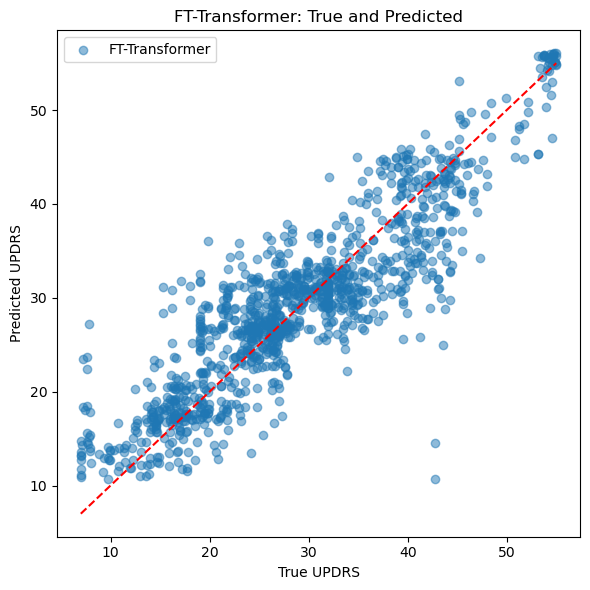

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred_ft, alpha=0.5, label="FT-Transformer")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

plt.xlabel("True UPDRS")
plt.ylabel("Predicted UPDRS")
plt.title("FT-Transformer: True and Predicted")
plt.legend()
plt.tight_layout()
plt.show()


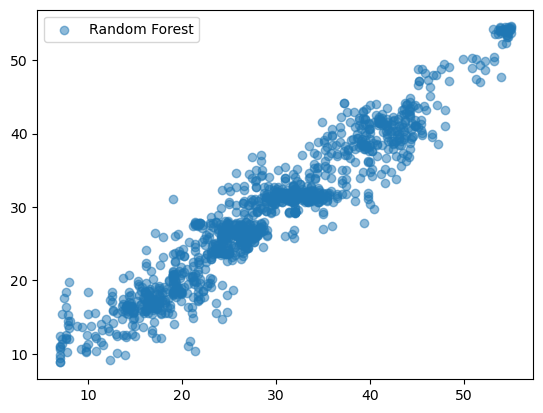

In [43]:
plt.scatter(y_true, y_pred_rf, alpha=0.5, label="Random Forest")
plt.legend()


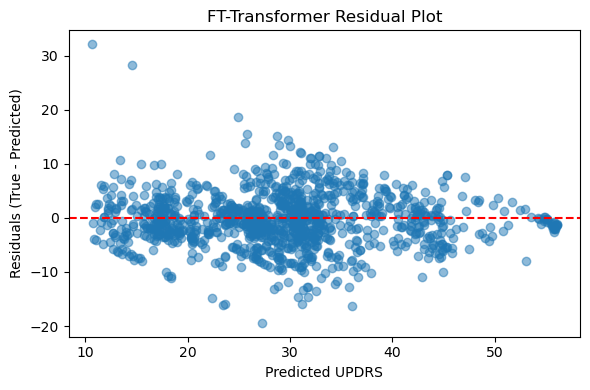

In [44]:
residuals = y_true - y_pred_ft

plt.figure(figsize=(6,4))
plt.scatter(y_pred_ft, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted UPDRS")
plt.ylabel("Residuals (True - Predicted)")
plt.title("FT-Transformer Residual Plot")
plt.tight_layout()
plt.show()


In [45]:
preds["total_UPDRS_prediction"].describe()


count    1175.000000
mean       29.184855
std         9.475229
min        10.656906
25%        23.214257
50%        29.051678
75%        33.649506
max        56.036835
Name: total_UPDRS_prediction, dtype: float64

In [46]:
from pytorch_lightning.loggers import CSVLogger

csv_logger = CSVLogger("logs", name="ft_transformer")


In [47]:
print(tabular_model.trainer.logged_metrics)

{'test_loss': tensor(24.3405), 'test_mean_squared_error': tensor(24.3405)}


In [48]:
print(tabular_model.trainer.callback_metrics)

{'test_loss': tensor(24.3405), 'test_mean_squared_error': tensor(24.3405)}


In [49]:
print(tabular_model.trainer.progress_bar_metrics)


{'test_loss': 24.340532302856445, 'test_mean_squared_error': 24.340532302856445}


In [50]:
print("train len =", len(loss_recorder.train_losses))
print("val len   =", len(loss_recorder.val_losses))
print("train list:", loss_recorder.train_losses)
print("val list  :", loss_recorder.val_losses)

train len = 80
val len   = 81
train list: [403.7631530761719, 120.6748275756836, 107.81787109375, 97.4940414428711, 85.447265625, 74.1303482055664, 98.10425567626953, 84.8570556640625, 86.87844848632812, 78.02666473388672, 80.77848052978516, 95.6274185180664, 62.549991607666016, 87.52815246582031, 82.30931091308594, 93.10730743408203, 60.00834274291992, 77.34785461425781, 89.0688705444336, 79.99639892578125, 64.78201293945312, 57.939395904541016, 59.63818359375, 63.611690521240234, 63.992584228515625, 59.017120361328125, 66.70901489257812, 58.22024154663086, 73.29718017578125, 100.70904541015625, 44.90644454956055, 87.36151123046875, 45.96205139160156, 59.1168098449707, 44.683467864990234, 56.02543258666992, 42.095497131347656, 27.224628448486328, 38.523040771484375, 128.2303009033203, 35.02962875366211, 41.13086700439453, 60.7894401550293, 51.5180549621582, 80.7060317993164, 57.161476135253906, 38.64552307128906, 52.74887466430664, 37.18879318237305, 39.760440826416016, 22.71944808959

In [52]:
import pandas as pd

train_losses = loss_recorder.train_losses
val_losses = loss_recorder.val_losses

n = min(len(train_losses), len(val_losses))

epochs = list(range(1, n + 1))

df_loss = pd.DataFrame({
    "epoch": epochs,
    "train_loss": train_losses[:n],
    "val_loss": val_losses[:n],
})

df_loss.to_csv("ft_transformer_loss_curve.csv", index=False)
print("CSV 导出完成: ft_transformer_loss_curve.csv")


CSV 导出完成: ft_transformer_loss_curve.csv


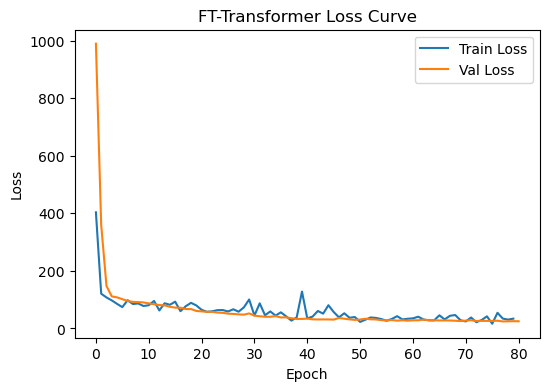

In [53]:
plt.figure(figsize=(6,4))
plt.plot(loss_recorder.train_losses, label="Train Loss")
plt.plot(loss_recorder.val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("FT-Transformer Loss Curve")
plt.legend()
plt.show()


In [54]:
fi_df = tabular_model.feature_importance()
fi_df = fi_df.sort_values("importance", ascending=False)
print(fi_df.head(20))


         Features  importance
12    Shimmer:DDA    0.052253
15           RPDE    0.048464
7         Shimmer    0.047657
17            PPE    0.047116
16            DFA    0.047020
0             age    0.045996
2       Jitter(%)    0.045192
13            NHR    0.044999
11  Shimmer:APQ11    0.044893
3     Jitter(Abs)    0.043509
14            HNR    0.042914
4      Jitter:RAP    0.042224
8     Shimmer(dB)    0.042128
5     Jitter:PPQ5    0.041813
1             sex    0.041626
6      Jitter:DDP    0.041458
10   Shimmer:APQ5    0.041243
9    Shimmer:APQ3    0.036784


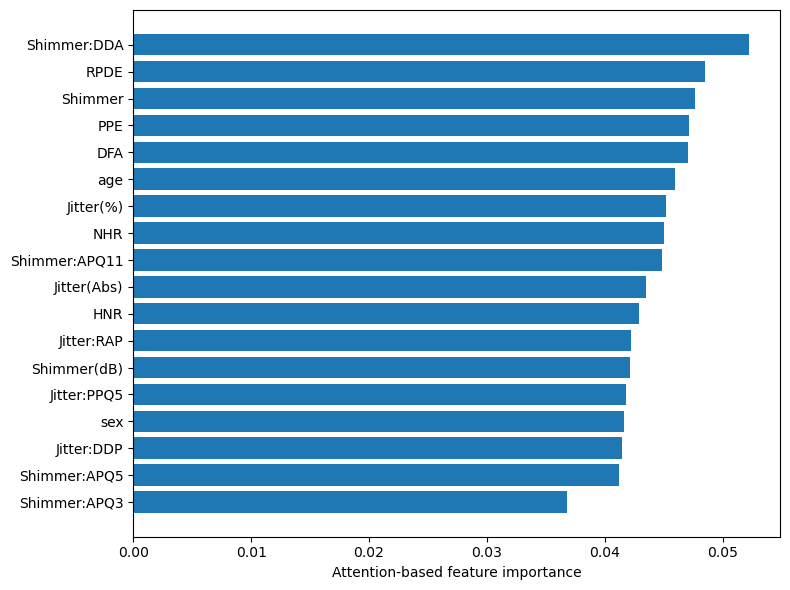

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(fi_df["Features"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.xlabel("Attention-based feature importance")
plt.tight_layout()
plt.show()


In [56]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

core_model = tabular_model.model        # BaseModel
backbone   = core_model.backbone        # FTTransformerBackbone

attn_maps = []  # 存每一层的注意力

def make_hook(layer_idx):
    def hook(module, input, output):
        # output: (out, attn_weights) 一般是这个结构
        if isinstance(output, tuple) and len(output) == 2:
            attn = output[1].detach().cpu()  # 形状通常是 [batch, heads, tokens, tokens]
            attn_maps.append(attn)
    return hook

import torch.nn as nn
for i, (name, module) in enumerate(backbone.named_modules()):
    if isinstance(module, nn.MultiheadAttention):
        module.register_forward_hook(make_hook(i))
        print("Registered hook on", name)


In [57]:
# 随便取一小块 val 数据，比如 256 行
val_small = val_df.sample(n=256, random_state=42)

_ = tabular_model.predict(val_small)  # 不在乎结果，只是为了触发 forward


/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.31642653 -0.20169079  0.94566663  0.94566663  1.17513811  1.51934534
  1.17513811  0.94566663 -0.31642653  0.83093089 -0.20169079  1.06040237
  0.25725218 -0.66063375 -0.89010524  0.0277807  -0.31642653 -0.31642653
  0.25725218 -0.89010524  1.06040237 -0.43116227  2.32249553 -1.11957672
 -0.89010524 -0.54589801 -1.11957672 -0.89010524 -0.54589801 -0.66063375
 -1.80799117  0.0277807  -0.7753695   0.14251644 -0.54589801  0.94566663
  0.71619515 -0.43116227  0.83093089  1.06040237  0.0277807  -0.20169079
  0.37198792  1.51934534  0.37198792 -0.43116227 -0.31642653  2.32249553
 -0.7753695  -0.7753695   0.37198792  1.17513811 -0.31642653  0.71619515
  0.71619515  0.25725218  0.25725218 -1.11957672  0.94566663  0.14251644
 -0.89010524 -0.7753695   0.94566663 -0.660633

In [59]:
print(tabular_model.model)


FTTransformerModel(
  (_backbone): FTTransformerBackbone(
    (add_cls): AppendCLSToken()
    (transformer_blocks): Sequential(
      (mha_block_0): TransformerEncoderBlock(
        (mha): MultiHeadedAttention(
          (to_qkv): Linear(in_features=32, out_features=768, bias=False)
          (to_out): Linear(in_features=256, out_features=32, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (pos_wise_ff): GEGLU(
          (ffn): PositionWiseFeedForward(
            (layer1): Linear(in_features=32, out_features=128, bias=False)
            (layer2): Linear(in_features=128, out_features=32, bias=False)
            (dropout): Dropout(p=0.1, inplace=False)
            (activation): GELU(approximate='none')
            (linear_v): Linear(in_features=32, out_features=128, bias=False)
          )
        )
        (attn_add_norm): AddNorm(
          (dropout): Dropout(p=0.1, inplace=False)
          (ln): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    

In [60]:
import torch
from pytorch_tabular.models.common.layers.transformers import MultiHeadedAttention

attn_maps = []  # 每次先清空

def hook_attn(module, input, output):
    # 这个模块在 forward 里面把注意力存在 module.attn_weights 里
    if hasattr(module, "attn_weights"):
        attn_maps.append(module.attn_weights.detach().cpu())

# 给所有 MultiHeadedAttention 模块挂 hook
for name, module in tabular_model.model.named_modules():
    if isinstance(module, MultiHeadedAttention):
        print("Registering hook on:", name)
        module.register_forward_hook(hook_attn)


Registering hook on: _backbone.transformer_blocks.mha_block_0.mha
Registering hook on: _backbone.transformer_blocks.mha_block_1.mha
Registering hook on: _backbone.transformer_blocks.mha_block_2.mha
Registering hook on: _backbone.transformer_blocks.mha_block_3.mha


In [61]:
_ = tabular_model.predict(val_df)
print("num attn maps:", len(attn_maps))


num attn maps: 20


/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.14251644 -3.29955582 -0.7753695  ... -1.11957672  0.0277807
 -0.7753695 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
/home/iris/miniconda3/envs/struct/lib/python3.12/site-packages/pytorch_tabular/tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.67896134  1.47283791 -0.67896134 ... -0.67896134 -0.67896134
 -0.67896134]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])


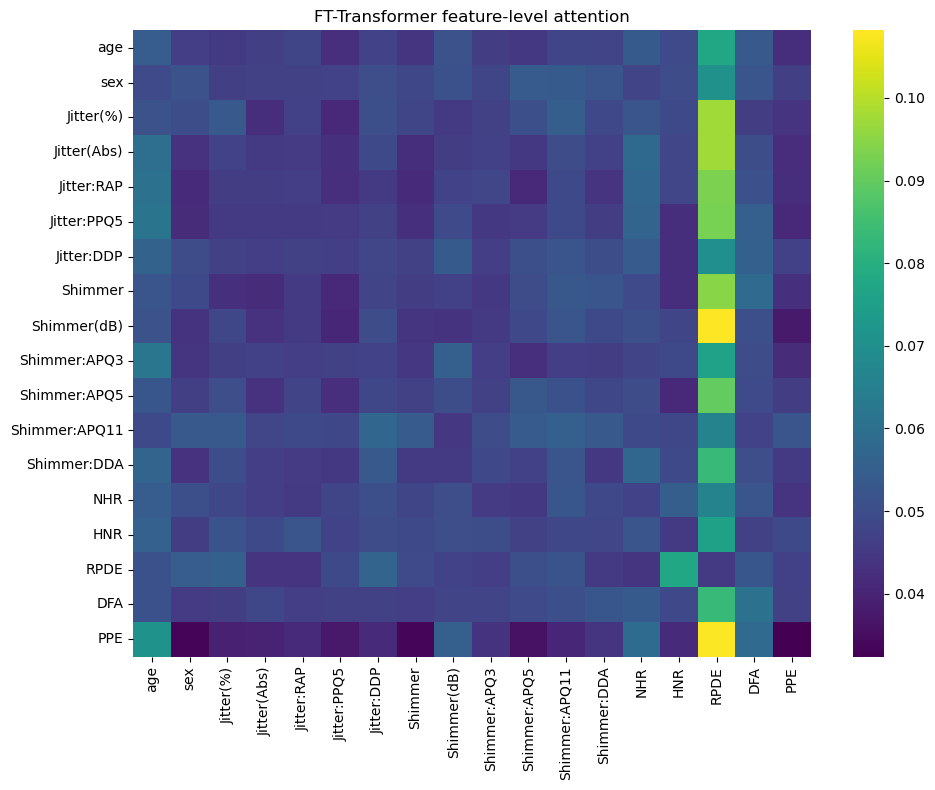

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 把所有 batch, layer 的 attention 拼在一起
all_attn = torch.cat(attn_maps, dim=0)   # 现在列表不空了
# 平均掉 head 维度 -> [N, T, T]
all_attn = all_attn.mean(dim=1)
# 再在 batch 维上取平均 -> [T, T]
attn_mean = all_attn.mean(dim=0).numpy()

# 0 号 token 是 CLS，所以去掉首行首列，看特征之间
attn_feat = attn_mean[1:, 1:]

feature_names = (
    list(tabular_model.config.categorical_cols)
    + list(tabular_model.config.continuous_cols)
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    attn_feat,
    xticklabels=feature_names,
    yticklabels=feature_names,
    cmap="viridis",
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("FT-Transformer feature-level attention")
plt.tight_layout()
plt.show()


In [63]:
fi_df = tabular_model.feature_importance().sort_values("importance", ascending=False)
fi_df.head(10)


,Features,importance
12,Shimmer:DDA,0.052253
15,RPDE,0.048464
7,Shimmer,0.047657
17,PPE,0.047116
16,DFA,0.047020
0,age,0.045996
2,Jitter(%),0.045192
13,NHR,0.044999
11,Shimmer:APQ11,0.044893
3,Jitter(Abs),0.043509
